# Team Members
Team Name - Team Seven
1. Reezwan Ul Haq Mohammad - rmoham27@uic.edu
2. Sai Anish Garapati - sgarap2@uic.edu
3. Vamsi Krishna Mandalapu - vmanda8@uic.edu

Project Name - Crash Prediction in Chicago

# Any Changes
Previously we wanted to build models around the usecase of predicting the fatality of the accident, but the number of accidents that involve serious fatalities are less. So we are building models around the usecase of predicting the 'Primary Reason for a Crash'

# Data
We are using 3 different datasets which are crashes dataset, vehicle dataset and people dataset. These datasets have the details of a crash occurred, vehicles involved in the crash and people invloved in the crash.
There are 700k rows with 49 columns of data in Crash Dataset.
Original size of vehicle dataset is 780 MB which has 1.5 million rows with 71 columns.
The people dataset contains information about people involved in a crash and if any injuries were sustained.
We are using the crash id which is contained in all the datasets to map them where if two or more vehicles are included in a crash, we pick the vehicle which is the reason for the crash.
Source

Crashes Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

Vehicle Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3

People Dataset - https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d


# Problem
The main idea of this project is to build predictive model that can tell us the primary reason for a crash given certain attributes which would help us to analyze the reasons that could lead to crash based on the primary crash reason. Understanding the possibility of a crash would help us to take preventive approaches to avoid them to a certain degree

# Research Question - Team Member 1
Q) What is the probability of a particular vehicle type to have a defect in its engine.
A) We can use Logistic regression model to answer the above question by taking vehicle defect as the independent variable in the

# Research Question - Team Member 2
Q) Based on the given parameters in crash table like speed limit, weather conditions, injuries, locations, etc, check if we can predict the Primary Reason for Crash.

# Research Question - Team Member 3
Q) How is the physical condition of a person is related to a crash?

# Data Cleaning - Team Member 1
Initially there were 1.5 million rows in the vehicle dataset and 71 columns out of which a lot of columns were redundant and would not be useful to build our model. So we have removed those columns and only included whichever are useful.
We came up with 11 columns at the end which has decreased the data size from 780MB to 100MB. 
Rows containing null values in crash id and vehicle id are removed and remaining columns are filled with their mean or mode.
There were outliers in number of passengers and vehicle year which are eliminated.
The final vehicle dataset has 134123 rows which will be further reduced once it is joined with people dataset and the crash dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from mlxtend.evaluate import feature_importance_permutation

In [3]:
#Get vehicle dataset and crash dataset from drive
path = os.path.join('C:' + os.sep, 'Users', 'NAYEEM AKHTER', 'Desktop', 'UIC', 'CS 418', 'Project', 'Traffic_Crashes-Vehicles.csv')
ve_data = pd.read_csv(path, low_memory=False)
path = os.path.join('C:' + os.sep, 'Users', 'NAYEEM AKHTER', 'Desktop', 'UIC', 'CS 418', 'Project', 'Traffic_Crashes-Crashes.csv')
vehicles_data = pd.read_csv(path, low_memory=False)

In [4]:
#Drop redundant columns which are not necessary
v_data = ve_data.drop(ve_data.columns[[0, 2, 4, 8, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71]], axis=1)
v_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422540 entries, 0 to 1422539
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   CRASH_RECORD_ID   1422540 non-null  object 
 1   CRASH_DATE        1422540 non-null  object 
 2   UNIT_TYPE         1420576 non-null  object 
 3   NUM_PASSENGERS    210509 non-null   float64
 4   VEHICLE_ID        1390358 non-null  float64
 5   MAKE              1390353 non-null  object 
 6   LIC_PLATE_STATE   1263971 non-null  object 
 7   VEHICLE_YEAR      1164656 non-null  float64
 8   VEHICLE_DEFECT    1390358 non-null  object 
 9   VEHICLE_USE       1390358 non-null  object 
 10  TRAVEL_DIRECTION  1390358 non-null  object 
dtypes: float64(3), object(8)
memory usage: 119.4+ MB


In [5]:
#Drop all NA and fill the other unknown values with mode and 0 values with mean
v_data.dropna(subset = ['CRASH_RECORD_ID', 'CRASH_DATE', 'VEHICLE_ID'],inplace = True)
v_data['UNIT_TYPE'].fillna(value = v_data['UNIT_TYPE'].mode()[0], inplace = True)
v_data['NUM_PASSENGERS'].fillna(value = v_data['NUM_PASSENGERS'].mean(), inplace = True)
v_data['MAKE'].fillna(value = v_data['MAKE'].mode()[0], inplace = True)
v_data['LIC_PLATE_STATE'].fillna(value = v_data['LIC_PLATE_STATE'].mode()[0], inplace = True)
v_data['VEHICLE_YEAR'].fillna(value = v_data['VEHICLE_YEAR'].mean(), inplace = True)
v_data['VEHICLE_DEFECT'].fillna(value = v_data['VEHICLE_DEFECT'].mode()[0], inplace = True)
v_data['VEHICLE_USE'].fillna(value = v_data['VEHICLE_USE'].mode()[0], inplace = True)
v_data['TRAVEL_DIRECTION'].fillna(value = v_data['TRAVEL_DIRECTION'].mode()[0], inplace = True)
v_data.head()

,CRASH_RECORD_ID,CRASH_DATE,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,MAKE,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_USE,TRAVEL_DIRECTION
0,24ddf9fd8542199d832e1c223cc474e5601b356f1d77a6...,01/22/2020 06:25:00 AM,DRIVER,1.470555,796949.0,INFINITI,IL,2017.000000,NONE,PERSONAL,N
1,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,DRIVER,1.470555,834816.0,HONDA,IL,2016.000000,UNKNOWN,PERSONAL,N
2,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.470555,834819.0,TOYOTA,IL,2010.000000,NONE,PERSONAL,N
3,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,09/28/2019 03:30:00 AM,PARKED,1.470555,834817.0,GENERAL MOTORS CORPORATION (GMC),IL,2008.000000,UNKNOWN,UNKNOWN/NA,N
4,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,04/13/2020 10:50:00 PM,DRIVER,1.470555,827212.0,BUICK,IL,2013.692788,NONE,PERSONAL,W


CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int32
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR        float64
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


(0.0, 10.0)

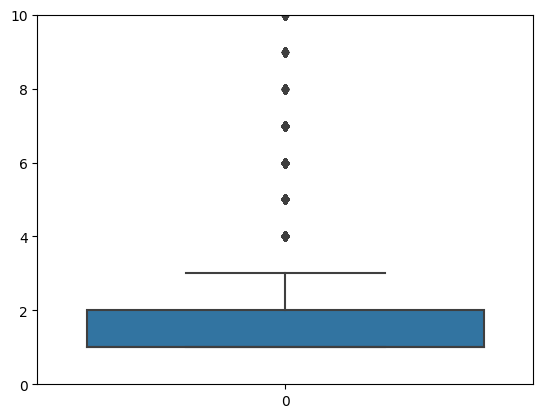

In [6]:
#Draw box plots for different features and remove the rows which are outliers
v_data = v_data.astype({'NUM_PASSENGERS':'int'})
print(v_data.dtypes)
a = sns.boxplot(ve_data['NUM_PASSENGERS'])
a.set_ylim(0,10)

336


<Axes: >

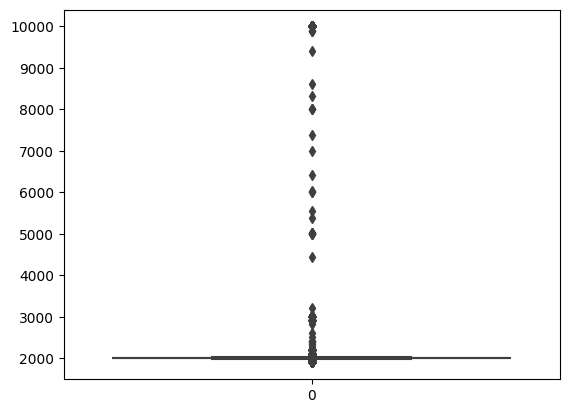

In [7]:
ind = v_data[(v_data['NUM_PASSENGERS'] > 8)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
v_data = v_data.astype({'LIC_PLATE_STATE':'str'})
sns.boxplot(ve_data['VEHICLE_YEAR'])

937
325


<Axes: >

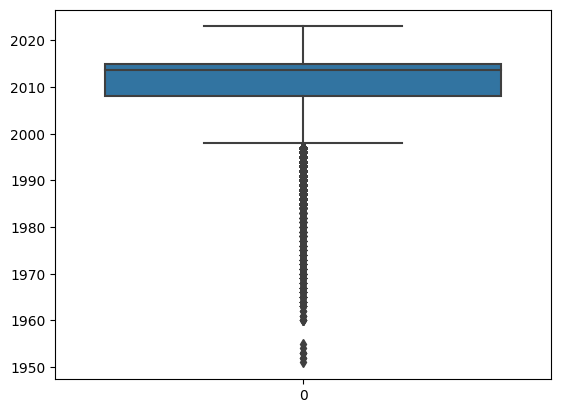

In [8]:
ind = v_data[(v_data['VEHICLE_YEAR'] > 2023)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
ind = v_data[(v_data['VEHICLE_YEAR'] < 1950)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

47521


<Axes: >

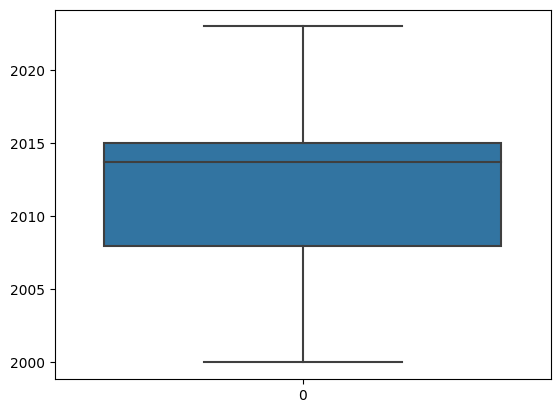

In [9]:
ind = v_data[(v_data['VEHICLE_YEAR'] < 2000)].index.tolist()
print(len(ind))
v_data.drop(ind, inplace = True)
sns.boxplot(v_data['VEHICLE_YEAR'])

In [10]:
vehicles_data

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698143,b91bf1a5a13ca3d15213b2313a1a0df8105ad129f4b42a...,JF333895,NaN,07/27/2022 03:05:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,6.0,0.0,0.0,15,4,7,41.847677,-87.678317,POINT (-87.678316682197 41.847677200391)
698144,6bd73dc0b10ee0272e9269bec32b57327611c2ad3cf19b...,JE435503,NaN,11/05/2021 10:56:00 PM,30,OTHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",OTHER OBJECT,...,0.0,0.0,1.0,0.0,22,6,11,41.876044,-87.700459,POINT (-87.700459346481 41.876043663599)
698145,15f6eb6cde6a026a007034c7081b1f3fac747fc3268591...,JC155211,NaN,02/17/2018 08:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,8,7,2,42.009193,-87.672396,POINT (-87.672396344055 42.009192992271)
698146,376bbadc3c632b81e0185fb1a3ddeed6c0dd52ebb8b3a9...,JC470758,NaN,10/13/2019 01:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,1,1,10,41.924150,-87.699151,POINT (-87.699150882692 41.924150305628)


In [11]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698148 entries, 0 to 698147
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                698148 non-null  object 
 1   RD_NO                          694074 non-null  object 
 2   CRASH_DATE_EST_I               52910 non-null   object 
 3   CRASH_DATE                     698148 non-null  object 
 4   POSTED_SPEED_LIMIT             698148 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         698148 non-null  object 
 6   DEVICE_CONDITION               698148 non-null  object 
 7   WEATHER_CONDITION              698148 non-null  object 
 8   LIGHTING_CONDITION             698148 non-null  object 
 9   FIRST_CRASH_TYPE               698148 non-null  object 
 10  TRAFFICWAY_TYPE                698148 non-null  object 
 11  LANE_CNT                       198998 non-null  float64
 12  ALIGNMENT                     

In [12]:
#Remove redundant columns
vehicles_data = vehicles_data.drop(vehicles_data.columns[[1, 2, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 46, 47, 48]], axis=1)
vehicles_data

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,IMPROPER TURNING/NO SIGNAL,1.0,14,2,3
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS,...",0.0,8,4,9
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,0,6,7
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,18,6,7
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,17,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698143,b91bf1a5a13ca3d15213b2313a1a0df8105ad129f4b42a...,07/27/2022 03:05:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,6.0,15,4,7
698144,6bd73dc0b10ee0272e9269bec32b57327611c2ad3cf19b...,11/05/2021 10:56:00 PM,30,OTHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",INJURY AND / OR TOW DUE TO CRASH,UNABLE TO DETERMINE,0.0,22,6,11
698145,15f6eb6cde6a026a007034c7081b1f3fac747fc3268591...,02/17/2018 08:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,0.0,8,7,2
698146,376bbadc3c632b81e0185fb1a3ddeed6c0dd52ebb8b3a9...,10/13/2019 01:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,FAILING TO YIELD RIGHT-OF-WAY,0.0,1,1,10


In [13]:
#Encode the features with labels
text_col = ['TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION','CRASH_TYPE','PRIM_CONTRIBUTORY_CAUSE','INJURIES_TOTAL']
c_data = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    c_data[col] = encoder.fit_transform(vehicles_data[col])
    
c_data

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL
0,16,1,2,3,0,24,1
1,4,3,2,3,1,38,0
2,17,6,2,1,1,36,0
3,16,1,2,3,1,36,0
4,4,3,2,5,1,36,0
...,...,...,...,...,...,...,...
698143,4,3,2,3,0,36,6
698144,6,1,2,1,0,36,0
698145,4,3,2,3,1,36,0
698146,4,3,2,1,1,18,0


In [14]:
#Get the columns which are necessary
col = ['CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH']
cn_data = pd.DataFrame(vehicles_data[col])
cn_data

,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,03/25/2019 02:43:00 PM,30,14,2,3
1,09/05/2018 08:40:00 AM,30,8,4,9
2,07/15/2022 12:45:00 AM,30,0,6,7
3,07/15/2022 06:50:00 PM,30,18,6,7
4,06/03/2018 05:00:00 PM,30,17,1,6
...,...,...,...,...,...
698143,07/27/2022 03:05:00 PM,35,15,4,7
698144,11/05/2021 10:56:00 PM,30,22,6,11
698145,02/17/2018 08:00:00 AM,30,8,7,2
698146,10/13/2019 01:40:00 AM,30,1,1,10


In [15]:
#Merge multiple features into a dataframe
df = pd.merge(c_data, cn_data, left_index=True, right_index=True)
df.dropna
df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,INJURIES_TOTAL,CRASH_DATE,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,16,1,2,3,0,24,1,03/25/2019 02:43:00 PM,30,14,2,3
1,4,3,2,3,1,38,0,09/05/2018 08:40:00 AM,30,8,4,9
2,17,6,2,1,1,36,0,07/15/2022 12:45:00 AM,30,0,6,7
3,16,1,2,3,1,36,0,07/15/2022 06:50:00 PM,30,18,6,7
4,4,3,2,5,1,36,0,06/03/2018 05:00:00 PM,30,17,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...
698143,4,3,2,3,0,36,6,07/27/2022 03:05:00 PM,35,15,4,7
698144,6,1,2,1,0,36,0,11/05/2021 10:56:00 PM,30,22,6,11
698145,4,3,2,3,1,36,0,02/17/2018 08:00:00 AM,30,8,7,2
698146,4,3,2,1,1,18,0,10/13/2019 01:40:00 AM,30,1,1,10


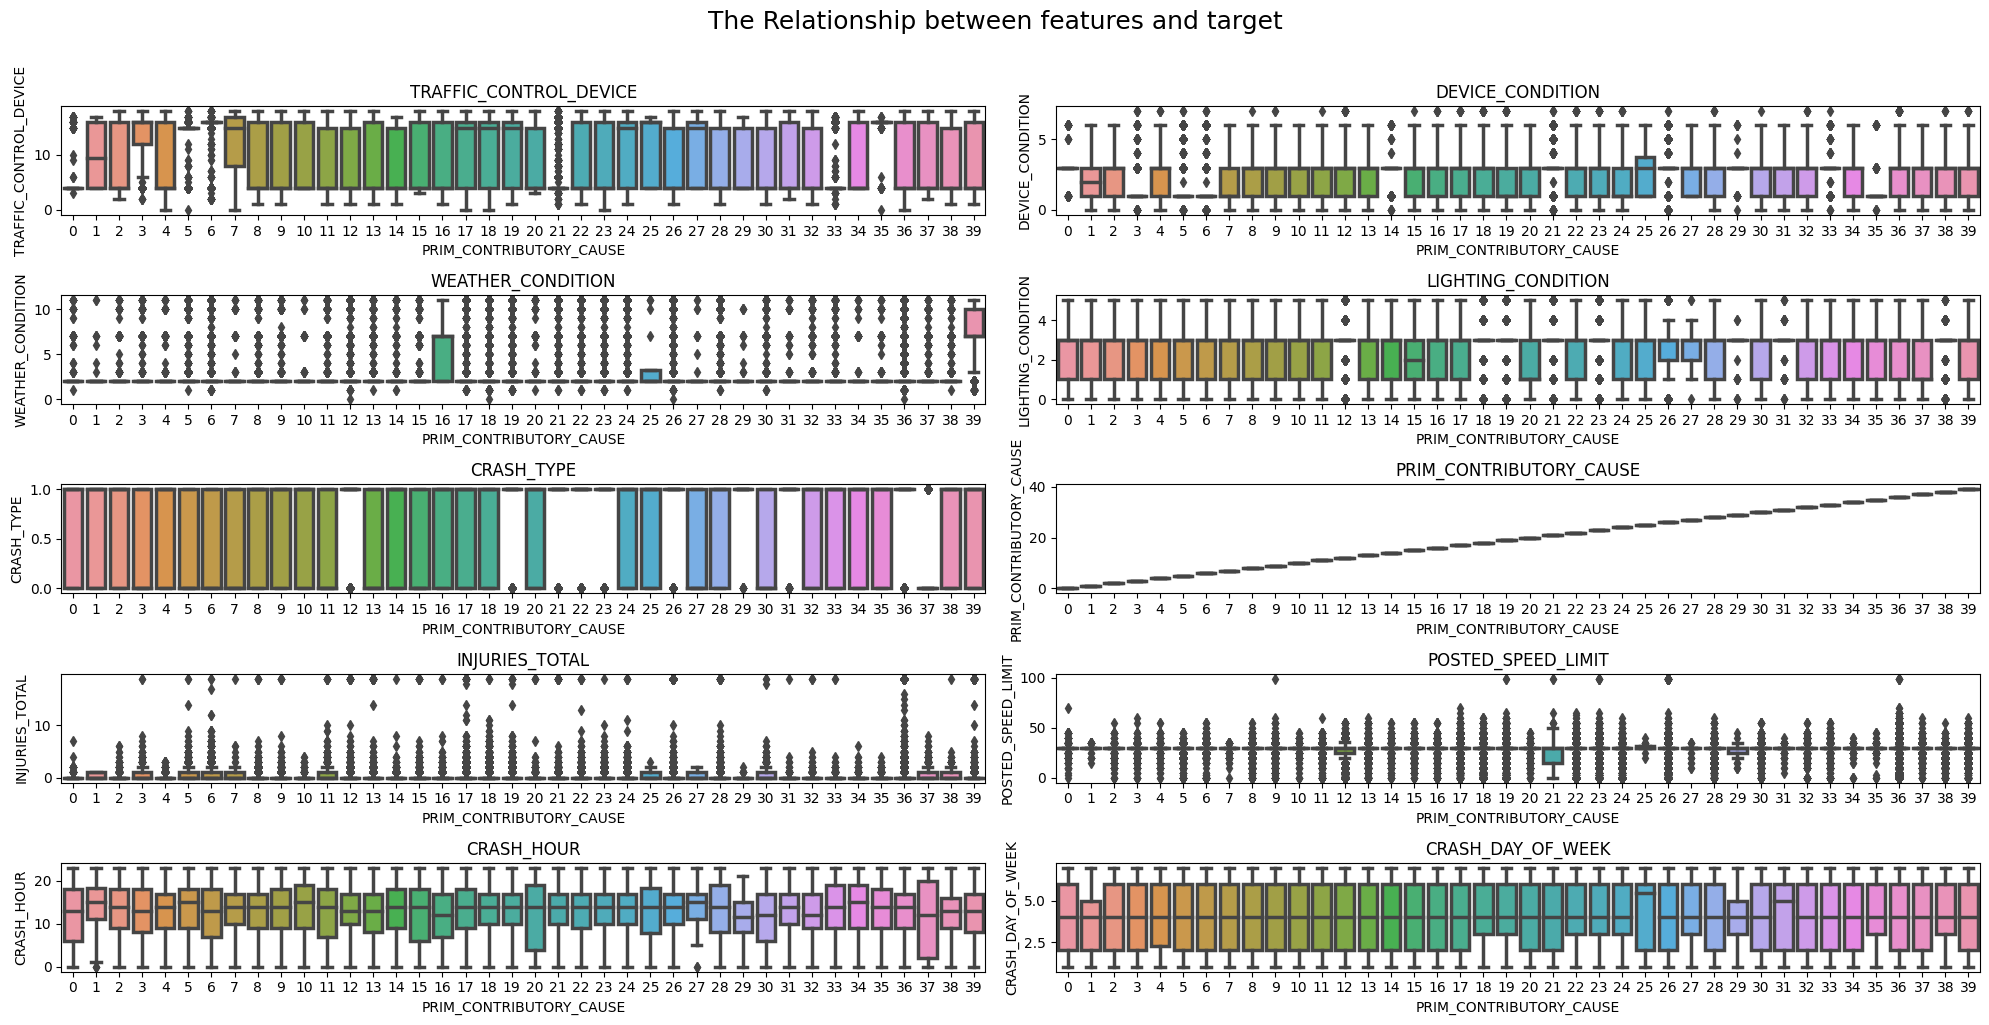

In [16]:
# Draw subplots for all the features with respect to its target to plot the outliers
fig, ax = plt.subplots(5,2, figsize=(20,10))
df = df.drop('CRASH_DATE', axis = 1)
for index,column in enumerate(list(df.columns[:10])):
  plt.subplot(5,2,index+1)
  sns.boxplot(y = df.loc[:, column], x = df["PRIM_CONTRIBUTORY_CAUSE"], linewidth=2.5)
  plt.title(column, size = 12)
plt.suptitle("The Relationship between features and target", y=1.02, size=18)
plt.tight_layout()
plt.show()

In [17]:
#Divide the dataset to train and test while labelling the target to y
y = df['PRIM_CONTRIBUTORY_CAUSE']
X = df.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# ML/STATS - Team Member 1

In [18]:
#Applying Logistic regression model to find out the accuracy and get the primary cause of crash
model = LogisticRegression(solver='liblinear', random_state=0)
clf_lr = model.fit(X, y)
y_train_pred_lr = clf_lr.predict(X_train)
y_test_pred_lr = clf_lr.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_lr)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_lr)}')

Accuracy Score Train: 0.3841093751678549
Accuracy Score Test: 0.38400057294277734


In [19]:
#Applying Decision tree model to find out the accuracy and get the primary cause of crash
dt_model = DecisionTreeClassifier(random_state=1, max_depth=5)
clf_dt = dt_model.fit(X, y)
y_train_pred_dt = clf_dt.predict(X_train)
y_test_pred_dt = clf_dt.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_dt)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_dt)}')

Accuracy Score Train: 0.3889722444039404
Accuracy Score Test: 0.3890138222445033


In [ ]:
#Plotting the decision tree for the following dataset
def plot_tree(dt, used_cols, out_file='mytree.png'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

plot_tree(dt_model, X.columns.tolist())

In [22]:
##Applying KNN classifier model to find out the accuracy and get the primary cause of crash
from sklearn.neighbors import KNeighborsClassifier
model_knc = KNeighborsClassifier(40)
clf_knc = model_knc.fit(X, y)
y_train_pred_knc = clf_knc.predict(X_train)
y_test_pred_knc = clf_knc.predict(X_test)

print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred_knc)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred_knc)}')

Accuracy Score Train: 0.39457815146512737
Accuracy Score Test: 0.3942061161641481


# Data Cleaning - Team Member 2
Initial size of PDF

In [5]:
crash_df = pd.read_csv('/Users/anish/Desktop/CS-418_project/Traffic_Crashes_Crashes.csv')

In [6]:
crash_df.shape

(708887, 49)

In [7]:
crash_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,NaN,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,NaN,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,NaN,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,NaN,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)


In [8]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708887 entries, 0 to 708886
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                708887 non-null  object 
 1   RD_NO                          704896 non-null  object 
 2   CRASH_DATE_EST_I               53679 non-null   object 
 3   CRASH_DATE                     708887 non-null  object 
 4   POSTED_SPEED_LIMIT             708887 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         708887 non-null  object 
 6   DEVICE_CONDITION               708887 non-null  object 
 7   WEATHER_CONDITION              708887 non-null  object 
 8   LIGHTING_CONDITION             708887 non-null  object 
 9   FIRST_CRASH_TYPE               708887 non-null  object 
 10  TRAFFICWAY_TYPE                708887 non-null  object 
 11  LANE_CNT                       199001 non-null  float64
 12  ALIGNMENT                     

Convert CRASH_DATE column to datetime format

In [9]:
crash_df['CRASH_DATE'] = pd.to_datetime(crash_df['CRASH_DATE'])
crash_df.CRASH_DATE.dtype.name

'datetime64[ns]'

In [10]:
crash_df.CRASH_DATE_EST_I.unique()

array([nan, 'N', 'Y'], dtype=object)

There are many rows for which type of crash date unknown, which means it is not known if the crash date is estimated or the exact one. We are not removing any such rows as even if the date is estimated or not we are not bothered. We need the date on which a crash occurred.

In [11]:
print('Number of crashes with no crash date at all: ', crash_df['CRASH_DATE'].isnull().sum())
print('Number of crashes with estimated crash date: ', crash_df['CRASH_DATE_EST_I'].value_counts())
print('Number of crashes with unknown date type: ', crash_df['CRASH_DATE_EST_I'].isnull().sum())

Number of crashes with no crash date at all:  0
Number of crashes with estimated crash date:  Y    46847
N     6832
Name: CRASH_DATE_EST_I, dtype: int64
Number of crashes with unknown date type:  655208


In [12]:
for column in crash_df.columns:
  if (crash_df[column].isnull().sum()/crash_df.shape[0] > 0.8):
    crash_df = crash_df.drop(column, axis=1)

crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708887 entries, 0 to 708886
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                708887 non-null  object        
 1   RD_NO                          704896 non-null  object        
 2   CRASH_DATE                     708887 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             708887 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         708887 non-null  object        
 5   DEVICE_CONDITION               708887 non-null  object        
 6   WEATHER_CONDITION              708887 non-null  object        
 7   LIGHTING_CONDITION             708887 non-null  object        
 8   FIRST_CRASH_TYPE               708887 non-null  object        
 9   TRAFFICWAY_TYPE                708887 non-null  object        
 10  LANE_CNT                       199001 non-null  float64       
 11  

Removing columns irrelevant to the research question manually

In [13]:
drop_columns = ['RD_NO', 'REPORT_TYPE',
                'CRASH_TYPE', 'INTERSECTION_RELATED_I',
                'DAMAGE', 'DATE_POLICE_NOTIFIED',
                'STREET_NO', 'STREET_DIRECTION',
                'STREET_NAME', 'LANE_CNT',
                'BEAT_OF_OCCURRENCE']
crash_df = crash_df.drop(drop_columns, axis=1)

Year wise distribution of the number of crashes

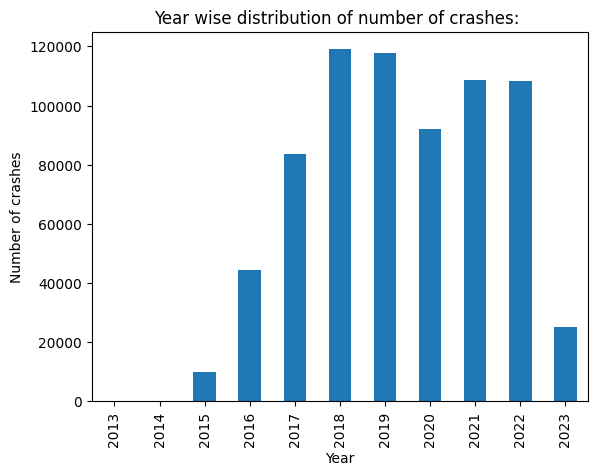

In [14]:
year_crashes = pd.Series(dict(sorted(dict(crash_df['CRASH_DATE'].dt.year.value_counts()).items())))
plt.title('Year wise distribution of number of crashes: ')
plt.xlabel('Year')
plt.ylabel('Number of crashes')

year_crashes.plot.bar()
plt.show()

Removing crashes with crash date before 2018 as they do not follow the recent trend and may mislead the model with outdated information

In [15]:
crash_df = crash_df[(crash_df['CRASH_DATE'] >= '2018-01-01')]

Remove crash rows with unknown primary cause of crash as it does not help our research question

In [16]:
crash_df = crash_df[crash_df['PRIM_CONTRIBUTORY_CAUSE'] != 'UNABLE TO DETERMINE']

In [17]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349140 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                349140 non-null  object        
 1   CRASH_DATE                     349140 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             349140 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         349140 non-null  object        
 4   DEVICE_CONDITION               349140 non-null  object        
 5   WEATHER_CONDITION              349140 non-null  object        
 6   LIGHTING_CONDITION             349140 non-null  object        
 7   FIRST_CRASH_TYPE               349140 non-null  object        
 8   TRAFFICWAY_TYPE                349140 non-null  object        
 9   ALIGNMENT                      349140 non-null  object        
 10  ROADWAY_SURFACE_COND           349140 non-null  object        
 11  

Taking care of NULL values:
1) Rows with columns like 'LOCATION', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING' having NULL values are being removed as they are small in number

2) Though HIT_AND_RUN_1 has many Null values, its an important feature that could be helpful in the prediction of the research question which is why its being filled with 'U' for Unknown

In [18]:
crash_df = crash_df.dropna(subset=['LOCATION', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING'])
crash_df['HIT_AND_RUN_I'].fillna('U', inplace=True)

Remvoing Outliers

In [19]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345930 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                345930 non-null  object        
 1   CRASH_DATE                     345930 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             345930 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         345930 non-null  object        
 4   DEVICE_CONDITION               345930 non-null  object        
 5   WEATHER_CONDITION              345930 non-null  object        
 6   LIGHTING_CONDITION             345930 non-null  object        
 7   FIRST_CRASH_TYPE               345930 non-null  object        
 8   TRAFFICWAY_TYPE                345930 non-null  object        
 9   ALIGNMENT                      345930 non-null  object        
 10  ROADWAY_SURFACE_COND           345930 non-null  object        
 11  

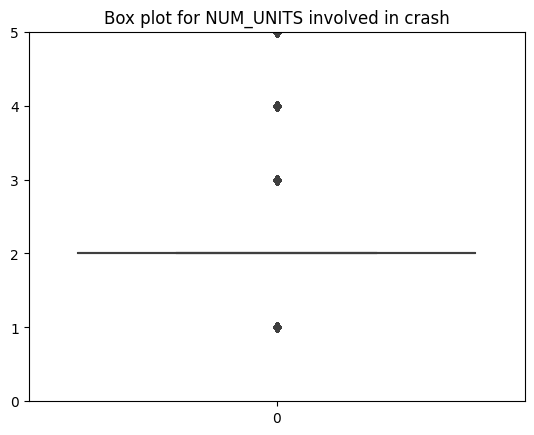

In [20]:
sns.boxplot(data=crash_df['NUM_UNITS']).set_ylim(0, 5)
plt.title('Box plot for NUM_UNITS involved in crash')
plt.show()

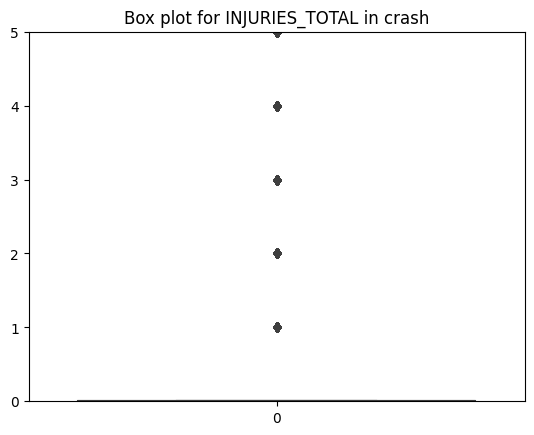

In [21]:
sns.boxplot(data=crash_df['INJURIES_TOTAL']).set_ylim(0, 5)
plt.title('Box plot for INJURIES_TOTAL in crash')
plt.show()

In [22]:
crash_df = crash_df[crash_df['NUM_UNITS'] <= 5]
crash_df = crash_df[crash_df['INJURIES_TOTAL'] <= 4]

Size of data after cleaning

In [23]:
crash_df.shape

(344695, 30)

# ML Stats - Team Member 2

In [24]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                344695 non-null  object        
 1   CRASH_DATE                     344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             344695 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         344695 non-null  object        
 4   DEVICE_CONDITION               344695 non-null  object        
 5   WEATHER_CONDITION              344695 non-null  object        
 6   LIGHTING_CONDITION             344695 non-null  object        
 7   FIRST_CRASH_TYPE               344695 non-null  object        
 8   TRAFFICWAY_TYPE                344695 non-null  object        
 9   ALIGNMENT                      344695 non-null  object        
 10  ROADWAY_SURFACE_COND           344695 non-null  object        
 11  

In [25]:
crash_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       61787
FOLLOWING TOO CLOSELY                                                               52907
NOT APPLICABLE                                                                      29560
IMPROPER OVERTAKING/PASSING                                                         27238
FAILING TO REDUCE SPEED TO AVOID CRASH                                              25253
IMPROPER BACKING                                                                    21816
IMPROPER LANE USAGE                                                                 19953
IMPROPER TURNING/NO SIGNAL                                                          18810
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 18283
DISREGARDING TRAFFIC SIGNALS                                                        11716
WEATHER                                                                              9134
OPERATING 

# Regression models for Research Question 2

In [26]:
X_cols = ['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'CRASH_HOUR', 'LATITUDE', 'LONGITUDE']
Y_cols = ['INJURIES_TOTAL']

In [27]:
crash_df['INJURIES_TOTAL'].value_counts()

0.0    287075
1.0     42945
2.0     10340
3.0      3202
4.0      1133
Name: INJURIES_TOTAL, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'SEC_CONTRIBUTORY_CAUSE', 'PRIM_CONTRIBUTORY_CAUSE']

crash_df[categorical_columns] = crash_df[categorical_columns].apply(LabelEncoder().fit_transform)

In [29]:
X_data = crash_df[X_cols]
Y_data = crash_df[Y_cols]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state=1, test_size=0.2, stratify=Y_data)

## Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train.values, Y_train.values)

In [38]:
print('MSE on test set for Linear Regression: ', mean_squared_error(Y_test.values, reg.predict(X_test.values)))

MSE on test set for Linear Regression:  0.3170693800632659


In [39]:
print('Regression score on test set for Linear Regression: ', reg.score(X_test.values, Y_test.values))

Regression score on test set for Linear Regression:  0.03894254902490968


## Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X_train.values)

poly_reg = LinearRegression().fit(poly_features, Y_train.values)

In [42]:
print('MSE on test set for Polynomial Regression: ', mean_squared_error(Y_test, poly_reg.predict(poly.fit_transform(X_test.values))))

MSE on test set for Polynomial Regression:  0.3117289364249424


In [43]:
print('Regression score on test set for Polynomial Regression: ', poly_reg.score(poly.fit_transform(X_test.values), Y_test))

Regression score on test set for Polynomial Regression:  0.055129773250406355


In [44]:
print(X_test.values[0])
print(Y_test.values[:2])

[ 30.           2.           3.           0.           8.
   2.           0.           1.          37.          17.
   2.          14.          41.6857645  -87.60328721]
[[2.]
 [0.]]


In [45]:
poly_reg.predict(poly.fit_transform(X_test.values)[:2])

array([[0.47359424],
       [0.12273988]])

## Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train.values, Y_train.values)

/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_84293/701259107.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train.values, Y_train.values)


RandomForestRegressor(max_depth=10, random_state=0)

In [47]:
print('MSE on test set for Random Forest Regressor: ', mean_squared_error(Y_test.values, regr.predict(X_test.values)))

MSE on test set for Random Forest Regressor:  0.2804788273738026


In [ ]:
print('Regression score on test set for Random Forest Regressor: ', )

# Data Cleaning - Team Member 3

In [36]:
df = pd.read_csv('/Users/Vamsi/Chicago_Traffic_Dataset/Traffic_Crashes_People.csv')

/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_79672/3160243224.py:1: DtypeWarning: Columns (20,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/Vamsi/Chicago_Traffic_Dataset/Traffic_Crashes_People.csv')


In [37]:
#Removing unwanted coloumns.
df.drop('DRIVERS_LICENSE_STATE', inplace=True, axis=1)
df.drop('DRIVERS_LICENSE_CLASS',inplace=True, axis=1)
df.drop('HOSPITAL',inplace=True, axis=1)
df.drop('EMS_AGENCY',inplace=True, axis=1)
df.drop('EMS_RUN_NO',inplace=True, axis=1)
df.drop('CELL_PHONE_USE',inplace=True, axis=1)
df.drop('BAC_RESULT',inplace=True, axis=1)
df.drop('BAC_RESULT VALUE',inplace=True, axis=1)
df.drop('PEDPEDAL_LOCATION',inplace=True, axis=1)
df.drop('PEDPEDAL_VISIBILITY',inplace=True, axis=1)
df.drop('SEAT_NO',inplace=True, axis=1)

In [38]:
df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,CHICAGO,IL,60651,M,25.0,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,CHICAGO,IL,60620,M,37.0,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,X,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,UNKNOWN,NaN


In [39]:
df['PEDPEDAL_ACTION'].value_counts().idxmax()

'CROSSING - WITH SIGNAL'

In [40]:
df[['PEDPEDAL_ACTION']] = df[['PEDPEDAL_ACTION']].fillna('CROSSING - WITH SIGNAL')

In [41]:
df['PHYSICAL_CONDITION'].value_counts().idxmax()

'NORMAL'

In [42]:
df[['PHYSICAL_CONDITION']] = df[['PHYSICAL_CONDITION']].fillna('NORMAL')
df[df.columns[18]].count()

1553935

In [43]:
df['DRIVER_VISION'].value_counts().idxmax()

'NOT OBSCURED'

In [44]:
df[['DRIVER_VISION']] = df[['DRIVER_VISION']].fillna('NOT OBSCURED')
df[df.columns[17]].count()

1553935

In [45]:
df['DRIVER_ACTION'].value_counts().idxmax()

'NONE'

In [46]:
df[['DRIVER_ACTION']] = df[['DRIVER_ACTION']].fillna('NONE')
df[df.columns[16]].count()

1553935

In [47]:
df['INJURY_CLASSIFICATION'].value_counts().idxmax()

'NO INDICATION OF INJURY'

In [48]:
df[['INJURY_CLASSIFICATION']] = df[['INJURY_CLASSIFICATION']].fillna('NO INDICATION OF INJURY')
df[df.columns[15]].count()

1553935

In [49]:
df['EJECTION'].value_counts().idxmax()

'NONE'

In [50]:
df[['EJECTION']] = df[['EJECTION']].fillna('NONE')
df[df.columns[14]].count()

1553935

In [51]:
df['AIRBAG_DEPLOYED'].value_counts().idxmax()

'DID NOT DEPLOY'

In [52]:
df[['AIRBAG_DEPLOYED']] = df[['AIRBAG_DEPLOYED']].fillna('DID NOT DEPLOY')
df[df.columns[13]].count()

1553935

In [53]:
df['SAFETY_EQUIPMENT'].value_counts().idxmax()

'SAFETY BELT USED'

In [54]:
df[['SAFETY_EQUIPMENT']] = df[['SAFETY_EQUIPMENT']].fillna('SAFETY BELT USED')
df[df.columns[13]].count()

1553935

In [55]:
df['AGE'].mean()

37.849625267957464

In [56]:
df[['AGE']] = df[['AGE']].fillna(37.0)
df[df.columns[12]].count()

1553935

In [57]:
df['SEX'].value_counts().idxmax()

'M'

In [58]:
df[['SEX']] = df[['SEX']].fillna('M')
df[df.columns[11]].count()

1553935

In [59]:
df['SEX'].value_counts().idxmax()

'M'

In [60]:
df.dropna(subset=['ZIPCODE', 'STATE', 'CITY','VEHICLE_ID'], inplace=True)

In [61]:
df.shape[0]

1002501

In [62]:
df.dropna(subset=['RD_NO'], inplace=True)

In [63]:
df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION'],
      dtype='object')

In [64]:
df.shape[0]

996630

Data cleaning: The data before cleaning contains 30 columns each with 1554338 rows and many NaN values, after carefull analysis, I removed nearly 10 coloumns of data and replaced NaN values of columns with it's respective mode or mean value and removed many rows with NaN values which cannot be replaced by mean or mode since they are unique ID's after applying all the above processes the data set reduced to 20 columns and 996969 rows.

# Exploratory Data Analysis - Team Member 1
The datatype of each column is mentioned below and visualization is done for two different scenarios
1) Year of vehicle manufactured involved in a crash
2) Type of vehicle involved in a crash

CRASH_RECORD_ID      object
CRASH_DATE           object
UNIT_TYPE            object
NUM_PASSENGERS        int32
VEHICLE_ID          float64
MAKE                 object
LIC_PLATE_STATE      object
VEHICLE_YEAR          int32
VEHICLE_DEFECT       object
VEHICLE_USE          object
TRAVEL_DIRECTION     object
dtype: object


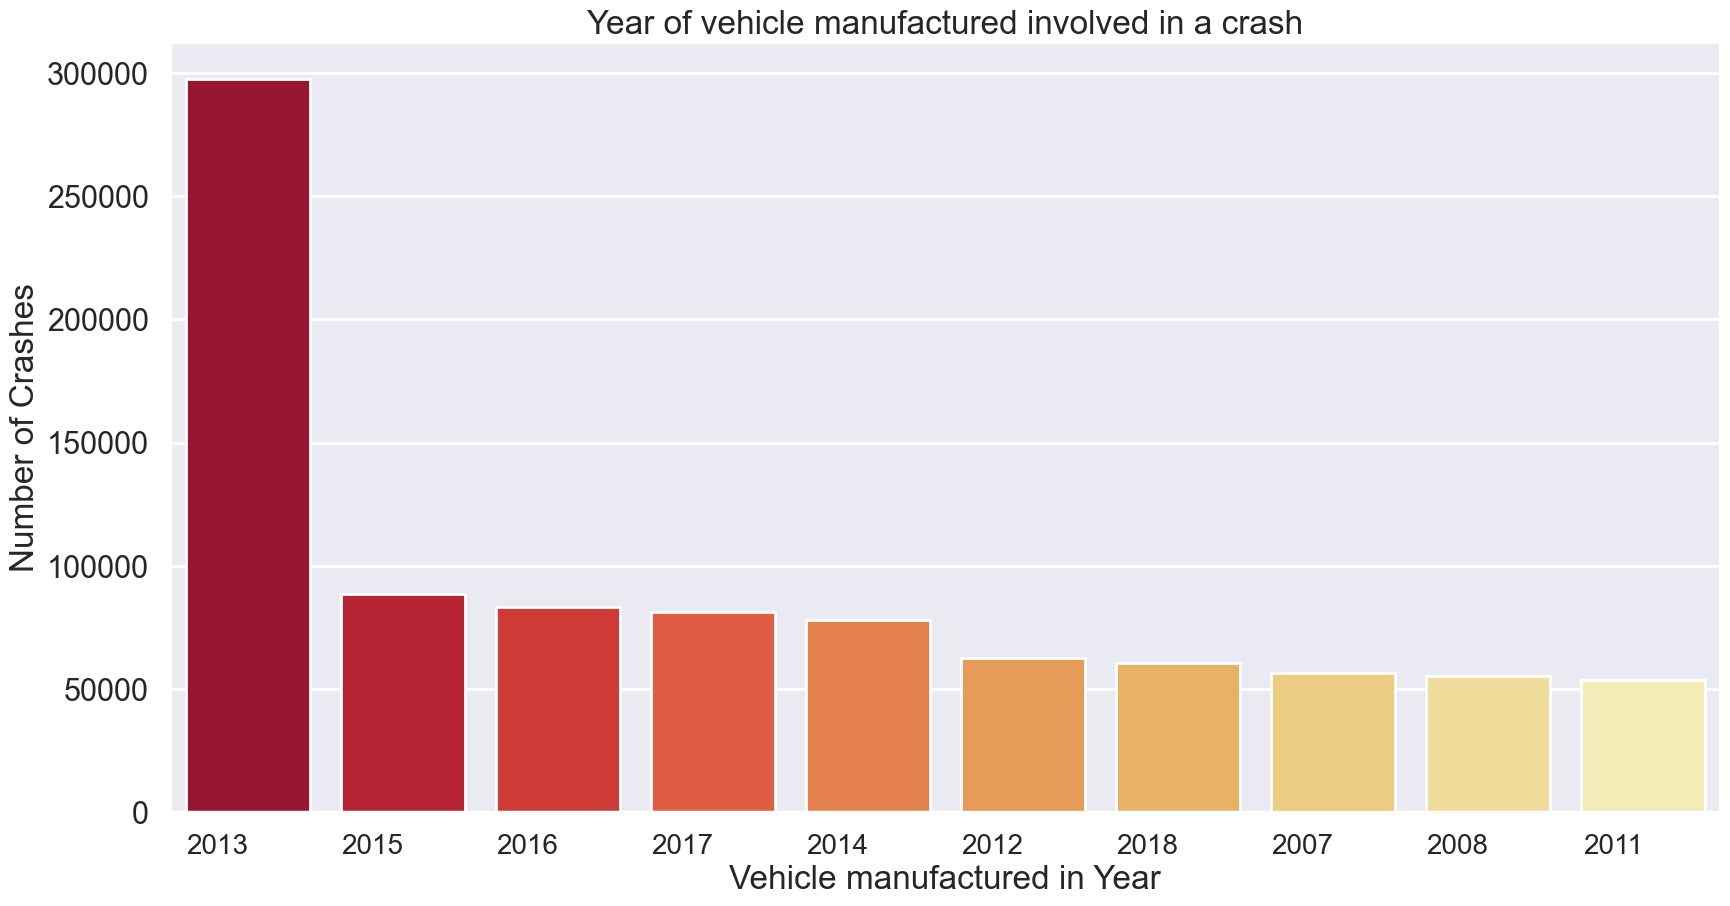

In [11]:
v_data = v_data.astype({'VEHICLE_YEAR':'int'})
print(v_data.dtypes)
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="VEHICLE_YEAR", data=v_data,order = v_data['VEHICLE_YEAR'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle manufactured in Year')
plt.ylabel('Number of Crashes')
plt.title('Year of vehicle manufactured involved in a crash')
plt.show()

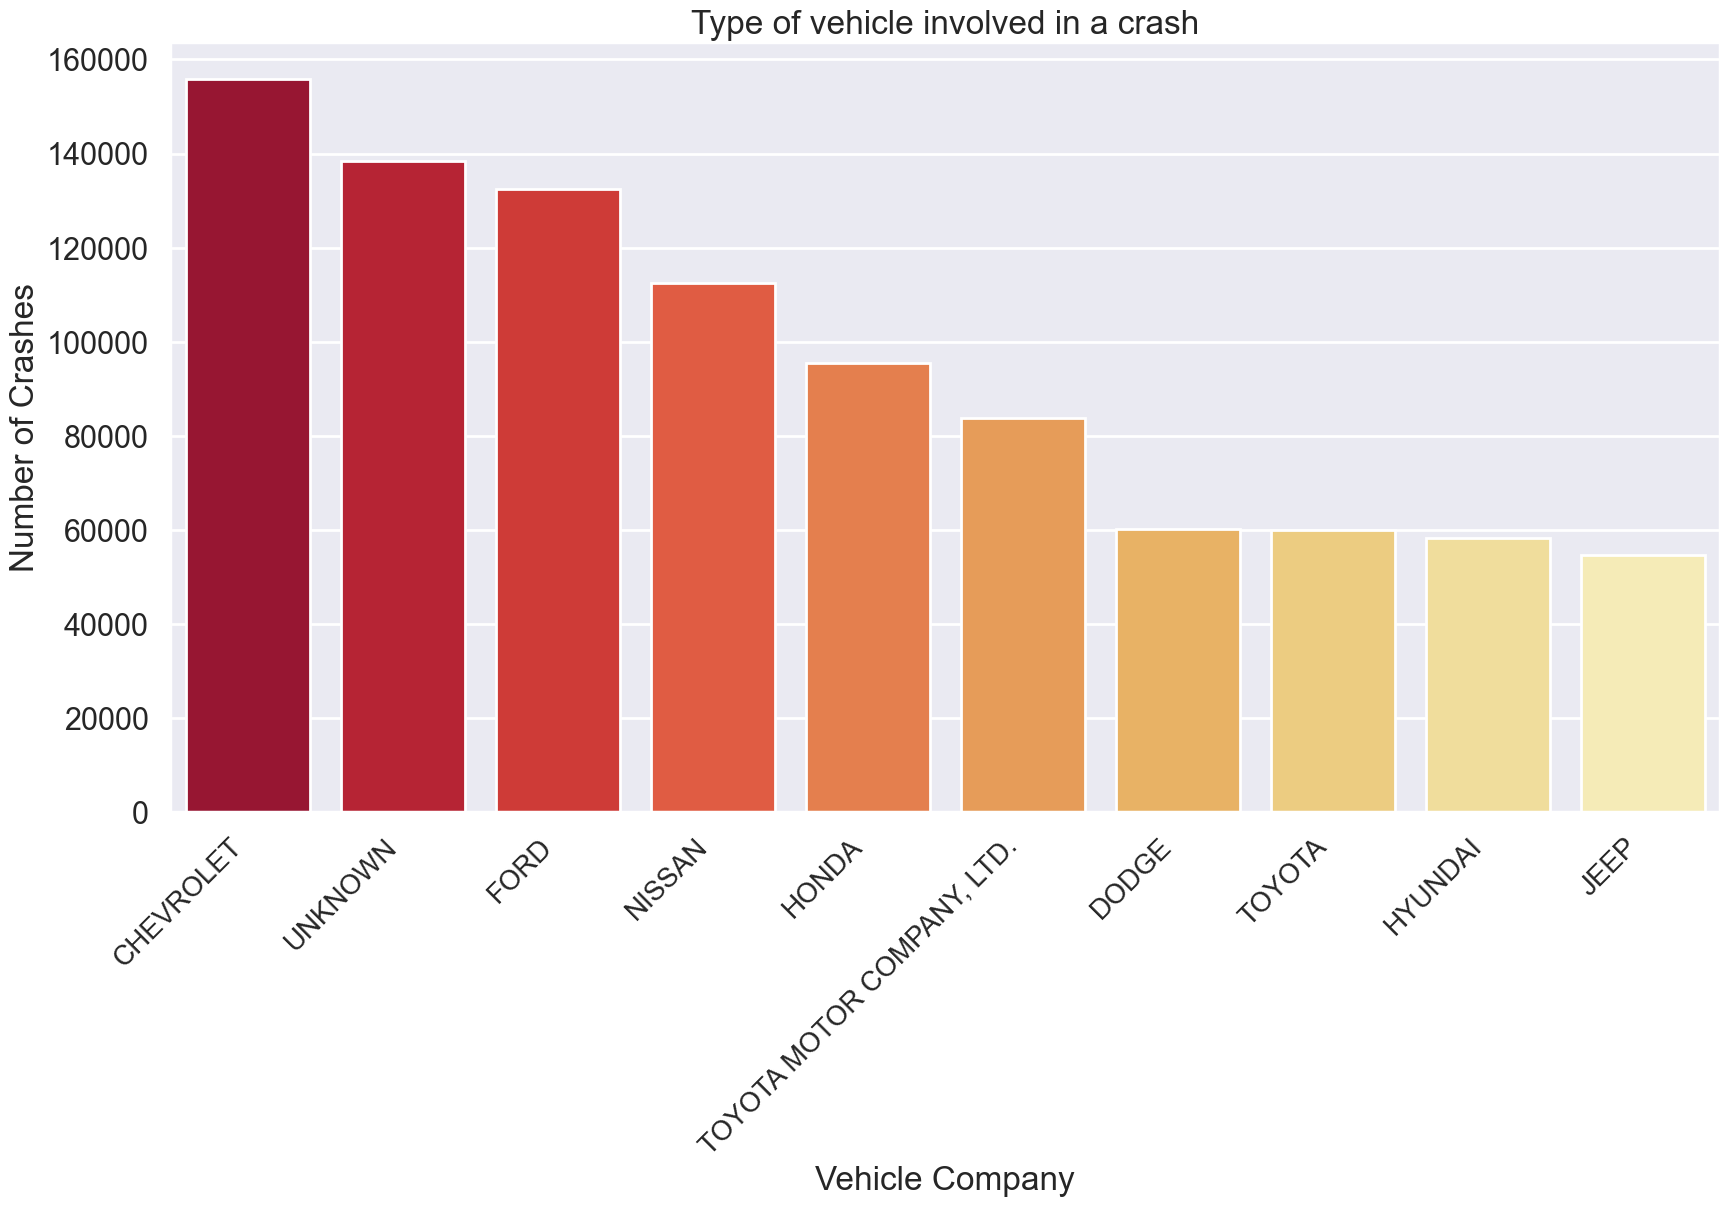

In [12]:
sns.set_context("poster")
sns.set_style("darkgrid")
plt.figure(figsize =(20,10))
plt.xticks( 
    rotation=45,
    horizontalalignment='right',
    fontsize='small'  
)

ax = sns.countplot(x="MAKE", data=v_data,order = v_data['MAKE'].value_counts().head(10).index, palette = 'YlOrRd_r')
plt.xlabel('Vehicle Company')
plt.ylabel('Number of Crashes')
plt.title('Type of vehicle involved in a crash')
plt.show()

# Exploratory Data Analysis - Team Member 2

In [27]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH_RECORD_ID                344695 non-null  object        
 1   CRASH_DATE                     344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT             344695 non-null  int64         
 3   TRAFFIC_CONTROL_DEVICE         344695 non-null  object        
 4   DEVICE_CONDITION               344695 non-null  object        
 5   WEATHER_CONDITION              344695 non-null  object        
 6   LIGHTING_CONDITION             344695 non-null  object        
 7   FIRST_CRASH_TYPE               344695 non-null  object        
 8   TRAFFICWAY_TYPE                344695 non-null  object        
 9   ALIGNMENT                      344695 non-null  object        
 10  ROADWAY_SURFACE_COND           344695 non-null  object        
 11  

In [28]:
crash_df_tmp = crash_df.copy(deep=True)
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder()

for col in crash_df_tmp.columns[1:]:
  if(crash_df_tmp[col].dtype == object):
    crash_df_tmp[col] = labelencoder.fit_transform(crash_df_tmp[col])

crash_df_tmp.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,2019-03-25 14:43:00,30,16,1,2,3,17,10,3,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,40251
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,2018-09-05 08:40:00,30,4,3,2,3,0,8,3,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,131945
5,7943cacbae1bb60e0f056bf53bdaadc0d6092000c19167...,2022-07-24 19:23:00,25,4,3,2,3,7,10,3,...,0.0,0.0,1.0,0.0,19,1,7,41.782639,-87.694284,94027
6,01aaa759c6bbefd0f584226fbd88bdc549de3ed1e46255...,2022-07-15 17:10:00,40,4,3,3,3,0,3,3,...,0.0,0.0,2.0,0.0,17,6,7,41.975826,-87.650420,50280
8,7b4700df143a2170b338fdf28c3ccb7c3aaa4527b0734e...,2018-11-26 10:00:00,30,16,1,10,3,0,8,3,...,0.0,0.0,2.0,0.0,10,2,11,41.744152,-87.585945,7811


/var/folders/yg/2xrqy8_10ql01m_xdm2p89mw0000gn/T/ipykernel_79672/1187064580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crash_df_tmp.corr(), annot=True, linewidths=.5, ax=axis)


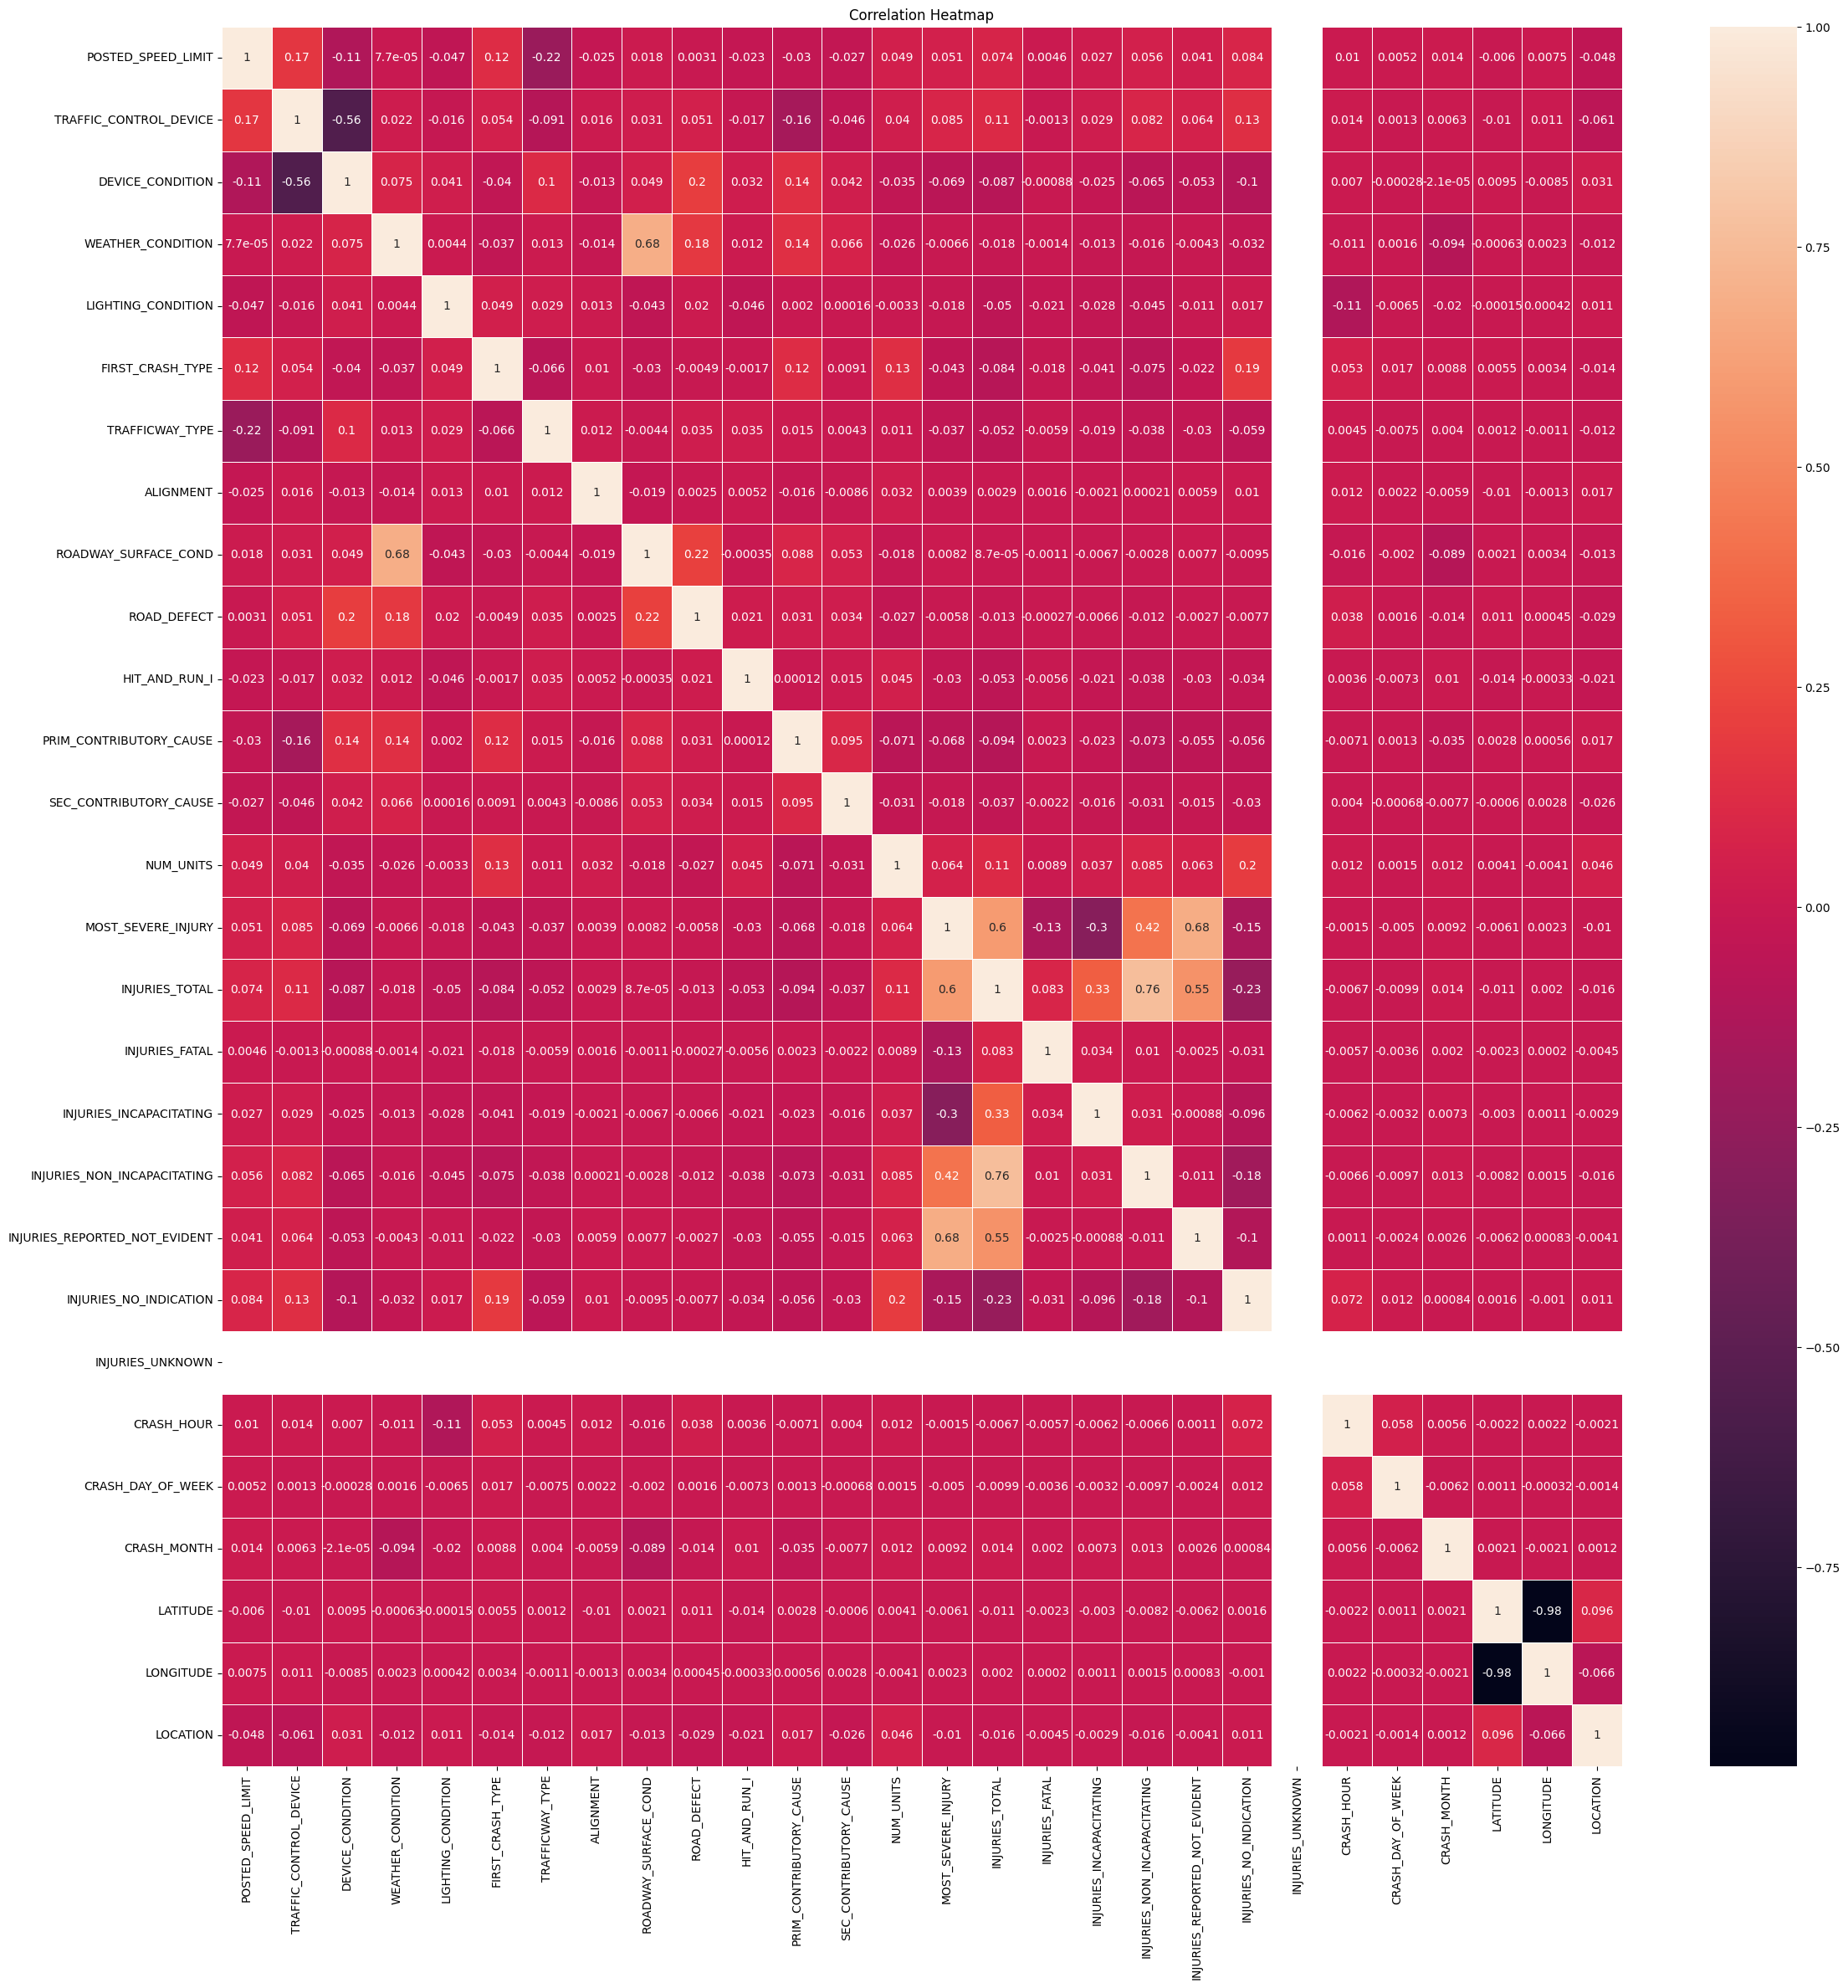

In [29]:
fig, axis = plt.subplots(figsize=(27,27))
sns.heatmap(crash_df_tmp.corr(), annot=True, linewidths=.5, ax=axis)
plt.title('Correlation Heatmap')
plt.show()

Removing some columns based on above correlation and manual inspection

In [30]:
columns = ['ALIGNMENT', 'TRAFFIC_CONTROL_DEVICE',
           'DEVICE_CONDITION', 'TRAFFICWAY_TYPE',
           'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE',
           'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
           'MOST_SEVERE_INJURY', 'INJURIES_REPORTED_NOT_EVIDENT',
           'INJURIES_NO_INDICATION']
crash_df = crash_df.drop(columns, axis=1)

In [31]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344695 entries, 0 to 708882
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CRASH_RECORD_ID              344695 non-null  object        
 1   CRASH_DATE                   344695 non-null  datetime64[ns]
 2   POSTED_SPEED_LIMIT           344695 non-null  int64         
 3   WEATHER_CONDITION            344695 non-null  object        
 4   LIGHTING_CONDITION           344695 non-null  object        
 5   FIRST_CRASH_TYPE             344695 non-null  object        
 6   ROADWAY_SURFACE_COND         344695 non-null  object        
 7   ROAD_DEFECT                  344695 non-null  object        
 8   HIT_AND_RUN_I                344695 non-null  object        
 9   PRIM_CONTRIBUTORY_CAUSE      344695 non-null  object        
 10  SEC_CONTRIBUTORY_CAUSE       344695 non-null  object        
 11  NUM_UNITS                 

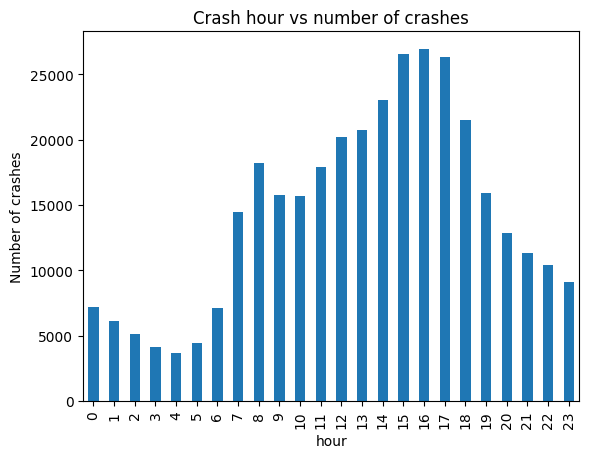

In [32]:
crash_hour_series = pd.Series(dict(sorted(dict(crash_df['CRASH_HOUR'].value_counts()).items())))

plt.title('Crash hour vs number of crashes')
plt.xlabel('hour')
plt.ylabel('Number of crashes')

crash_hour_series.plot.bar()
plt.show()

The above plot tells us a distibution of the period of day during which most crashes are happening, so we could know a pattern. We can see peak at hour 15 in the afternoon at which maximum crashes occur.

<AxesSubplot: title={'center': 'Trend of Number of injuries with respect to month and year'}, xlabel='CRASH_DATE,CRASH_DATE', ylabel='Injuries'>

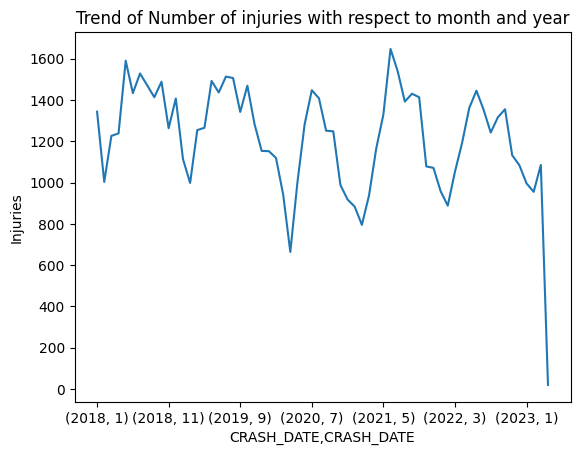

In [34]:
year_trend = pd.Series(crash_df.groupby([crash_df['CRASH_DATE'].dt.year, crash_df['CRASH_DATE'].dt.month])['INJURIES_TOTAL'].sum())
plt.title('Trend of Number of injuries with respect to month and year')
plt.xlabel('Year')
plt.ylabel('Injuries')
year_trend.plot.line()

In the above time series over months in the years, we can see a slightly more than normal dips around the years 2020-2021 which could be because of the pandemic that though the number of crashes did not reduce, there is a dip in the total number of injuries

# Exploratory Data Analysis - Team Member 3

The data after cleaning contains of columns without any NaN value and the column schemma looks like PERSON_ID (plain Text) A unique identifier for each person record. IDs starting with P indicate passengers. IDs starting with O indicate a person who was not a passenger in the vehicle (e.g., driver, pedestrian, cyclist, etc.).

By observing all the coloumns I find the corelations between the places and the number of accidents and also between safety equipment inside the car often causes more damage if it doesn't worked properly.

In [65]:
df2 = df.groupby(['CITY'])['CITY'].count()
df2=df2.sort_values(ascending=False).head(10)
print(df2)

CITY
CHICAGO         704035
CICERO           10279
SKOKIE            6781
BERWYN            5878
EVANSTON          5754
CALUMET CITY      4884
OAK LAWN          4848
OAK PARK          4079
DES PLAINES       3908
ELMWOOD PARK      3544
Name: CITY, dtype: int64


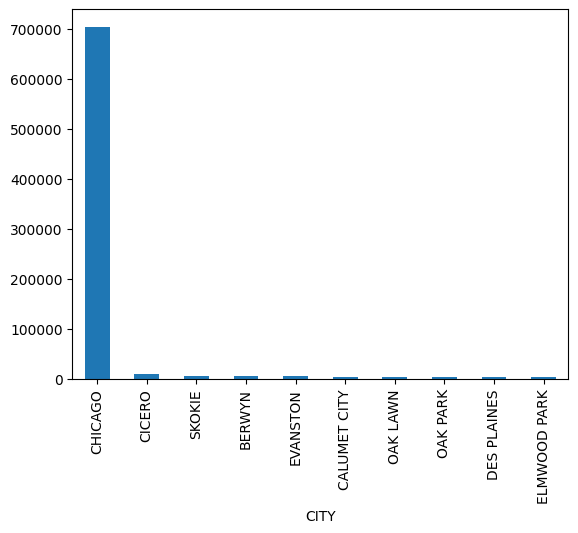

In [66]:
df2.plot.bar()
plt.show()

An interesting hypothethis, I would like to explain here is the realation between the city and the number of vehicle crashes, I found it's interesting because cities are usually populated and very well maintained but then a lot of accidents are happening in very well known places and it makes me think for ideas which includes data analysis to prevent as many accidents as possible.

In [68]:
df.value_counts("PHYSICAL_CONDITION")

PHYSICAL_CONDITION
NORMAL                          857019
UNKNOWN                         122124
IMPAIRED - ALCOHOL                4545
FATIGUED/ASLEEP                   2945
REMOVED BY EMS                    2828
OTHER                             2442
EMOTIONAL                         2248
ILLNESS/FAINTED                   1008
HAD BEEN DRINKING                  598
IMPAIRED - DRUGS                   499
IMPAIRED - ALCOHOL AND DRUGS       248
MEDICATED                          126
dtype: int64

# Model Planning - Team Member 1

1) Logistic Regression
Logistic regression is a statistical model used to analyze the relationship between a binary dependent variable and one or more independent variables
Pros
It can be used for a variety of tasks such as classification and prediction
It is relatively simple
Cons
Overfitting
Limited to binary outcomes

2) Polynomial Regression
Polynomial regression is a statistical model used to analyze the relationship between a dependent variable and an independent variable, where the relationship is not linear but can be modeled as a polynomial function.
Pros
Accuracy
Interpretability
Cons
Overfitting
Determining the degree of polynomial

3) Lasso Regression
Lasso regression is a linear regression technique that is used for feature selection and regularization. We can use this regression to get better features while predicting the final outpcome about the crash
Pros
Feature selection
Robustness
Cons
Bias in the estimates of the coefficients
It can be unstable in the presence of highly correlated predictors

# Model Planning - Team Member 2

ion type algorithms to answer this research question: 
1) Neural Network model

This is proved to be performing very great for classification type tasks, and we also have about 18 features with mix of numeric and categorical and inputs to neural networks usually works well with different types of inputs.

Pros:
Great for datasets with mixture of feature types
Provides good performance and can be trained with deep layers

Cons:
May not give desired performance on this size of the data
Known to overfit over small or medium sized datasets

2) Random Forest Algorithm

This algorithm is better than decision trees and can handle more features better and reduces the chances of overfitting the training data

Pros:
Very rare chances of overfitting the data and usually takes less time than NN and this further be optmized with techniques such as pruning.

Cons:
May produce less accuracy with fewer number of trees and increasing the number of trees would increase the training time.

3) Support Vector Machines

Simple and efficient algorithm and could perform better on this dataset as it mostly contains categroical data, it could be easy to draw decision boundaries.

Pros:
Very fast training and predicition times
Can also perform classification accurately in higher dimension space

Cons:
Hard to comprehend the requirements of SVM
Could underperform on large datasets

# Model Planning - Team Member 3
The research question in my case is related to the physical condition of the person and the crash, I choose methods clustering to work on the research question such as K-means, k-nearest neighbors, Centroid based clustering. through which I can group people with similar physical characteristics, behaviors and disabilities so that it can help me to identify meaningful patterns, which can be further used to train the model for futher analysis and decision making.

# Reflection
The important part of our project is finding an appropriate dataset, as of now we have analyzed the datasets and have a brief idea of what models we need to implement to make our model efficient, I think we are on a right track with the project as of now and after exploring the data we feel it is completely worth proceeding with the project since it is a practical and an interesting problem to solve.

# Next Steps
Next we plan to combine or join tables based on our requirements for the research questions and prepare the dataset or preprocess it in terms of feeding it as input to our appropriate machine learning models. Then we would do the training and validation on the dataset using the models and tune the hyper parameters appropriately. We would evaluate the project on the results or accuracies achieved on test dataset for our research questions and would also give some new inputs and do some manual inspection to see the performance of the best model.

# Github Link
https://github.com/CS418/group-project-seven/blob/main/team_seven_CS_418.ipynb

# References 
https://www.geeksforgeeks.org/clustering-in-machine-learning/

https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

https://pandas.pydata.org/docs/

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.line.html